In [2]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [3]:
input_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\ten-crops-somas-vs-neurites'

In [4]:
img_list = os.listdir(input_path)

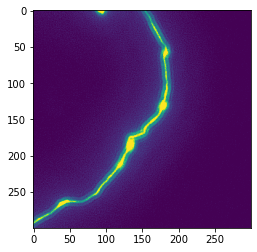

In [5]:
current_img_path = os.path.join(input_path, img_list[3])
current_img = cv2.imread(current_img_path, 0)
plt.imshow(current_img)

In [6]:
row, col = current_img.shape
print("the row and col are: ", row, col)

the row and col are:  300 300


In [7]:
centerRow, centerCol = int(row/2), int(col/2)
print("center row and col are: ", centerRow, centerCol)

center row and col are:  150 150


In [8]:
centerRectangle = 10

[[163.36407 154.7025  128.38817 ... 148.70598 128.38817 154.7025 ]
 [155.2219  130.1838  122.14728 ... 125.82154 138.35245 137.12857]
 [146.32657 158.79576 136.52966 ... 147.1184  136.16719 140.44902]
 ...
 [157.62457 159.34483 131.89957 ... 145.41327 153.46185 150.11626]
 [146.32657 140.44902 136.16719 ... 136.81975 136.52966 158.79576]
 [155.2219  137.12857 138.35245 ... 123.71944 122.14728 130.1838 ]]
150.55276


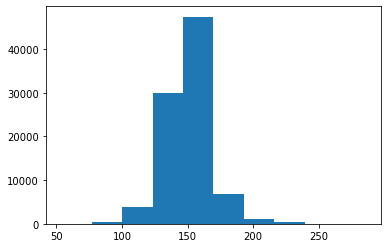

In [13]:
# imgAngle = np.angle(imgFFT2)
# print("img fft angle is: ", imgAngle)
dft = cv2.dft(np.float32(current_img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
imgMagnitude = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
print(imgMagnitude)
plt.hist(imgMagnitude.ravel(), bins=10)
print(np.median(imgMagnitude))

In [50]:
# high pass filtering
dft_shift[centerRow - centerRectangle: centerRow + centerRectangle,
            centerCol - centerRectangle: centerCol + centerRectangle] = 0

dft_i_shift = np.fft.ifftshift(dft_shift)
# print(dft_i_shift)
# plt.imshow(np.abs(FFT2shift))

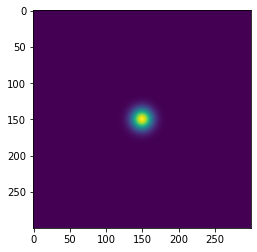

In [38]:
# creating a guassian filter
x = cv2.getGaussianKernel(300,10)

gaussian = x*x.T
plt.imshow(gaussian)

f = np.fft.fft2(current_img)
f_shift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(f_shift))
# plt.hist(magnitude_spectrum.ravel(), bins=30)

f_shift_gaussian = f_shift * gaussian
f_i_shift_gaussian = np.fft.ifftshift(f_shift_gaussian)
img_back_gaussian = np.fft.ifft(f_i_shift_gaussian)
img_back_gaussian = np.abs(img_back_gaussian)
magnitude_spectrum_gaussian = 20*np.log(img_back_gaussian)
# plt.hist(magnitude_spectrum_gaussian.ravel(), bins=30)

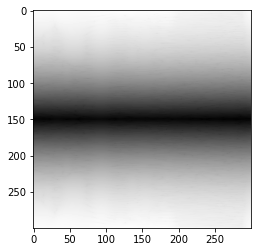

In [39]:
plt.imshow(magnitude_spectrum_gaussian, cmap='gray')

467410.94
[2082012.6 1644710.9 3152393.2 ... 2027054.9 2613088.8 2643744.5]


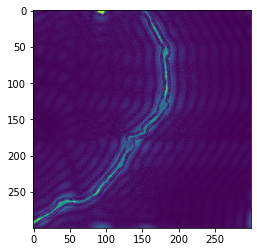

In [51]:
# Inverse Transfer to show the image
img_back = cv2.idft(dft_i_shift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
median_img_back = np.median(img_back.ravel())
print(median_img_back)
print(img_back.ravel())
plt.imshow(img_back)
#
# img_HPF_iFFT_shift = np.fft.ifftshift(imgFFT_shift_HPF)
# img_back = cv2.idft(img_HPF_iFFT_shift)
# img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# img_LPF_iFFT_mag = np.abs(img_LPF_iFFT)
# print(img_back)
# plt.imshow(img_back)